In [1]:
# ================================
# IMPORT LIBRARIES
# ================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, f_oneway, pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# ================================
# LOAD AND EXPLORE THE DATASET
# ================================
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
df=pd.read_csv(boston_url)

# Display basic info
print("Dataset Shape:", df.shape)
print(df.head())
print(df.describe())
print(df.info())

Dataset Shape: (506, 14)
   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  
       Unnamed: 0        CRIM          ZN       INDUS        CHAS         NOX  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   252.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994

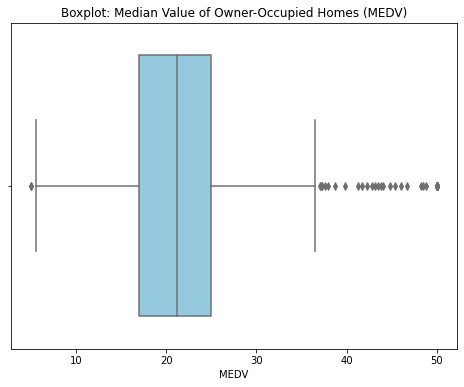

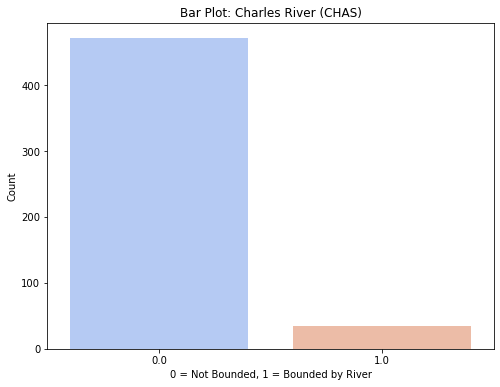

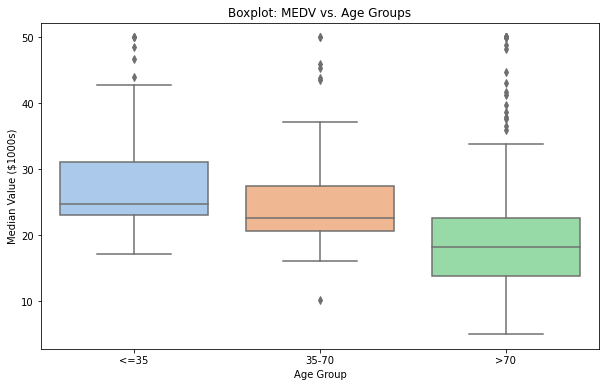

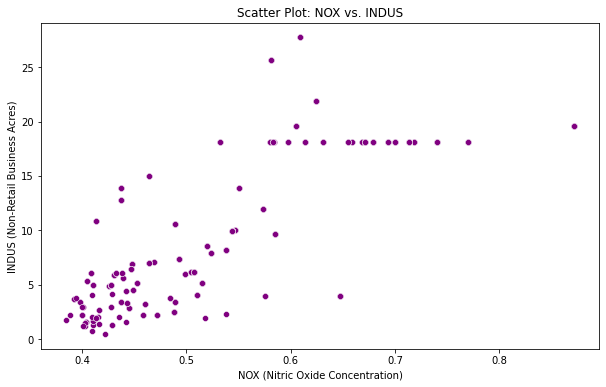

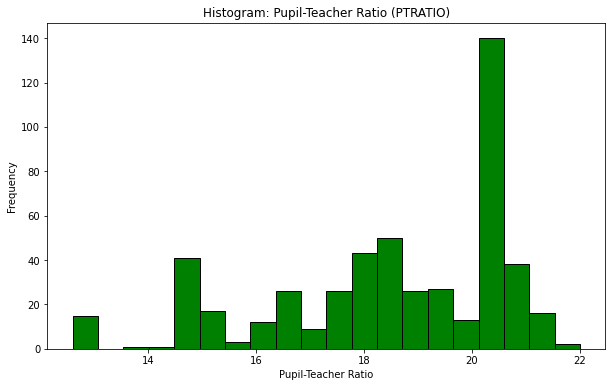

In [3]:
# ================================
# VISUALIZATIONS
# ================================

# Boxplot for MEDV
plt.figure(figsize=(8, 6))
sns.boxplot(x='MEDV', data=df, color='skyblue')
plt.title('Boxplot: Median Value of Owner-Occupied Homes (MEDV)')
plt.show()

# Bar plot for CHAS
plt.figure(figsize=(8, 6))
sns.countplot(x='CHAS', data=df, palette='coolwarm')
plt.title('Bar Plot: Charles River (CHAS)')
plt.xlabel('0 = Not Bounded, 1 = Bounded by River')
plt.ylabel('Count')
plt.show()

# Boxplot for MEDV vs. AGE groups
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=[0, 35, 70, 100], labels=['<=35', '35-70', '>70'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=df, palette='pastel')
plt.title('Boxplot: MEDV vs. Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Median Value ($1000s)')
plt.show()

# Scatter plot for NOX vs INDUS
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NOX', y='INDUS', data=df, color='purple')
plt.title('Scatter Plot: NOX vs. INDUS')
plt.xlabel('NOX (Nitric Oxide Concentration)')
plt.ylabel('INDUS (Non-Retail Business Acres)')
plt.show()

# Histogram for PTRATIO
plt.figure(figsize=(10, 6))
plt.hist(df['PTRATIO'], bins=20, color='green', edgecolor='black')
plt.title('Histogram: Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

In [4]:
# ================================
# HYPOTHESIS TESTING
# ================================

# **T-test: CHAS impact on MEDV**
print("\nT-test: Is there a significant difference in median values between CHAS groups?")
group1 = df[df['CHAS'] == 1]['MEDV']
group2 = df[df['CHAS'] == 0]['MEDV']

t_stat, p_value = ttest_ind(group1, group2)
print(f"T-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")
if p_value < 0.05:
    print("✅ There is significant difference in MEDV between CHAS groups.")
else:
    print("❌ There is no significant difference in MEDV between CHAS groups.")

# **ANOVA: MEDV vs. AGE groups**
print("\nANOVA: Is there a difference in MEDV across AGE groups?")
anova_result = f_oneway(
    df[df['AGE_GROUP'] == '<=35']['MEDV'],
    df[df['AGE_GROUP'] == '35-70']['MEDV'],
    df[df['AGE_GROUP'] == '>70']['MEDV']
)
print(f"F-statistic: {anova_result.statistic:.4f}, p-value: {anova_result.pvalue:.4f}")
if anova_result.pvalue < 0.05:
    print("✅ There is significant difference in MEDV across AGE groups.")
else:
    print("❌ There is no significant difference in MEDV across AGE groups.")

# **Pearson Correlation: NOX vs. INDUS**
print("\nPearson Correlation: Is there a relationship between NOX and INDUS?")
corr, p_value_corr = pearsonr(df['NOX'], df['INDUS'])
print(f"Correlation coefficient: {corr:.4f}, p-value: {p_value_corr:.4f}")
if p_value_corr < 0.05:
    print("✅ There is significant correlation between NOX and INDUS.")
else:
    print("❌ There is no significant correlation between NOX and INDUS.")


T-test: Is there a significant difference in median values between CHAS groups?
T-statistic: 3.9964, p-value: 0.0001
✅ There is significant difference in MEDV between CHAS groups.

ANOVA: Is there a difference in MEDV across AGE groups?
F-statistic: 36.4076, p-value: 0.0000
✅ There is significant difference in MEDV across AGE groups.

Pearson Correlation: Is there a relationship between NOX and INDUS?
Correlation coefficient: 0.7637, p-value: 0.0000
✅ There is significant correlation between NOX and INDUS.



Regression Analysis: Impact of DIS on MEDV
Mean Squared Error: 71.5788
R² Score: 0.0394


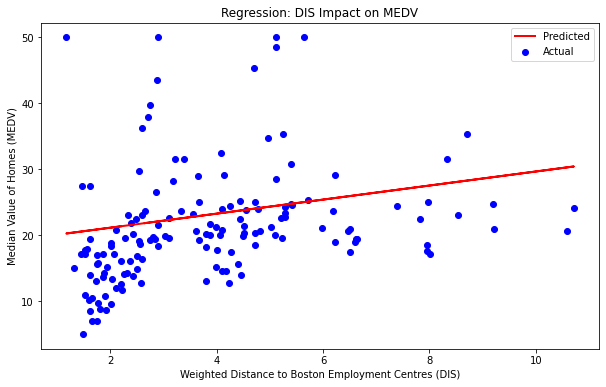

In [5]:
# ================================
# REGRESSION ANALYSIS: DIS IMPACT ON MEDV
# ================================

# Selecting features and target variable
X = df[['DIS']]
y = df['MEDV']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nRegression Analysis: Impact of DIS on MEDV")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Plotting regression
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Regression: DIS Impact on MEDV')
plt.xlabel('Weighted Distance to Boston Employment Centres (DIS)')
plt.ylabel('Median Value of Homes (MEDV)')
plt.legend()
plt.show()


# Conclusion



📊 1. T-test: Difference in Median Values of Houses Bounded by the Charles River
t-statistic: 3.9964

p-value: 0.0001

✅ Conclusion:
Since the p-value (0.0001) is less than the significance level (α = 0.05), we reject the null hypothesis.
➡️ There is a statistically significant difference in the median value of houses bounded by the Charles River compared to those that are not.



📈 2. ANOVA: Difference in Median Values of Houses by Age Groups
F-statistic: 36.4076

p-value: 1.71e-15 (which is effectively 0)

✅ Conclusion:
Since the p-value is extremely small (far below 0.05), we reject the null hypothesis.
➡️ There is a significant difference in the median value of houses across the different age groups.



🔗 3. Pearson Correlation: Relationship Between Nitric Oxide Concentrations (NOX) and Proportion of Non-Retail Business Acres (INDUS)
Correlation coefficient: 0.7637

p-value: 7.91e-98 (effectively 0)

✅ Conclusion:
Since the p-value is extremely small, the correlation is statistically significant.
➡️ There is a strong positive correlation (0.76) between NOX concentration and the proportion of non-retail business acres per town.
This means that as NOX levels increase, the proportion of non-retail business acres also tends to increase.



📉 4. Regression Analysis: Impact of Distance to Employment Centers (DIS) on Median Home Value (MEDV)
Mean Squared Error (MSE): 71.5788

R² Score: 0.0394

✅ Conclusion:
The R² value is very low (0.0394), indicating that only ~3.94% of the variation in median home values is explained by the distance to employment centers.
The positive slope suggests that as the distance to employment centers increases by one unit, the median home value increases by approximately $1,091.
➡️ However, the weak R² indicates that distance alone is not a strong predictor of home value.

